# UK Polling Data

As the 2015 UK general election result was quite surprising to the pollsters, it is natural to ask why they were surprised and to analyse the polling data.  Mark Pack has aggregated all the polling data from the 1940s into an excel spreadsheet and made it available to the geenral public.  It is a fantastic resource and can be downloaded from the following website:

http://www.markpack.org.uk/opinion-polls/

As ever, the first thing to do is to read in the file and look at it to see what is in there.

In [79]:
# First of all, import files into python
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import xlrd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
#xlsfile = pd.ExcelFile('./Data/Polls/Mark-Packs-opinion-polls-spreadsheet_macl.xls')

xl1 = pd.ExcelFile("./Data/Polls/Mark-Packs-opinion-polls-spreadsheet_macl.xls")
xl1.sheet_names

[u'Introduction',
 u'43-45',
 u'45-50',
 u'50-51',
 u'51-55',
 u'55-59',
 u'59-64',
 u'64-66',
 u'66-70',
 u'70-74',
 u'74',
 u'74-79',
 u'79-83',
 u'83-87',
 u'87-92',
 u'92-97',
 u'97-01',
 u'01-05',
 u'05-10',
 u'10-',
 u'Monthly average',
 u'By election polls',
 u'2014 Euros',
 u'Ratings',
 u'P-polls',
 u'YouGov accuracy',
 u'YouGov rolling']

Now, this file comprises many sheets.  Most of the sheets separate the polling into different year ranges.  The first one I will look at is the most recent, which is 2010 onwards.  To do this, I parse by the sheet name, which is "10-"

In [89]:
#df_2010_2015 = xlsfile.parse('10-')
df_2010_2015 = xl.parse("10-")

In [90]:
df_2010_2015

,Year,Month,Fieldwork,Unnamed: 3,Published,Unnamed: 5,Polling,Publisher,Con,Unnamed: 9,...,Govt net,Question.1,Con.1,Lab.1,LD.1,UKIP.1,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,2010,May,12-13,2010-05-12,16,NaN,ComRes,IoS/SM,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,12-13,2010-05-12,16,NaN,ICM,STel,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,May,13-14,2010-05-13,16,NaN,YouGov,ST,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,NaN,May,14-16,2010-05-14,19,NaN,Angus RS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,May,19,2010-05-19,20?,NaN,YouGov,Sun,NaN,NaN,...,20,Do you approve or disapprove of the Government...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,May,19-20,2010-05-19,NaN,NaN,YouGov,NaN,NaN,NaN,...,20,Do you approve or disapprove of the Government...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,NaN,May,20-21,2010-05-20,23,NaN,YouGov,ST,39,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
7,NaN,May,21-25,2010-05-21,NaN,NaN,Opinium,NaN,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,May,21-24,2010-05-21,25,NaN,Angus RS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,May,21-23,2010-05-21,25,NaN,ICM,GU,39,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another one to look at is the 05-10 polls.  There was a hung parliament in 2010 which led to a coalition government formed by the conservatives and the Liberal Democrats

In [91]:
df_2005_2010 = xl1.parse('05-10')

In [92]:
df_2005_2010.head()

,Year,Month,Fieldwork,Unnamed: 3,Published,Polling,Publisher,Con,Unnamed: 8,M,...,LD good,LD bad,LD net,Question,Unnamed: 48,MORI LD,YouGov LD,ICM LD,Populus LD,ComRes LD
0,2005,May,19-23,2011-05-19,NaN,MORI,First Tuesday,27,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,19-23,2005-05-19,NaN,MORI,FT,30,NaN,NaN,...,49,28,21,Are you satisfied or dissatisfied with the way...,NaN,26,,,,
2,NaN,May,24-26,2005-05-24,NaN,YouGov,DT,31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,23,,,
3,NaN,Jun,16-20,2005-06-16,7,MORI,Social Research Institute,29,-1,NaN,...,46,26,20,Are you satisfied or dissatisfied with the way...,NaN,21,,,,
4,NaN,Jun,17-19,2005-06-17,21,ICM,GU,31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,,


Note that there are a lot of columns in these files and I need to investigate which ones can be dropped or not, as not all will be relevant to my analysis.

The different columns in the 2010-2015 data are:

- 0) Year - Year the poll was taken.  Not every value is filled in.
- 1) Month - Month the poll was taken.
- 2) Fieldwork - Days of the month that the poll was taken.
- 3) Unnamed: 3 - Date format of the date that the poll was started
- 4) Published - The day of the month that it was published.  Often uncertain
- 5) Unnamed: 5 - empty?
- 6) Polling - Name of the polling company
- 7) Publisher - Newspaper which published it
- 8) Con - Conservative polling value
- 9) Unnamed: 9 - Difference in polling value between for the Conservatives between this poll and the previous poll by the same company
- 10) Lab - Labour polling value
- 11) Unnamed: 11 - Difference in polling value between for Labour between this poll and the previous poll by the same company
- 12) LD - Liberal Democrats polling value
- 13) Unnamed: 13 - Difference in polling value between for the Liberal Democrats between this poll and the previous poll by the same company
- 14) Con lead - the Conservative lead in the opinion polls when compared to Labour.  Note that a negative number would mean that Labour were ahead in the polls
- 15) Unnamed: 15 - Difference in the value of the Conservative lead between this poll and the previous poll by the same company
- 16) Unnamed: 16 - Type of poll (internet, phone)
- 17) Unnamed: 17 - Comments
- 18) Unnamed: 18 - Unknown (empty?)
- 19) Unnamed: 19 - Unknown (empty?)
- 20) UKIP - UKIP polling value
- 21) Green - Green polling value
- 22) BNP - BNP polling value
- 23) Unnamed: 23 - Unknown (empty?)
- 24) Leader: - I think this is just separating the previous columns from the next ones
- 25) Con good - % of respondents who approve of the Conservative leader
- 26) Con bad - % of respondents who disapprove of the Conservative leader
- 27) Con net - net %
- 28) Lab good - % of respondents who approve of the Labour leader
- 29) Lab bad - % of respondents who adispprove of the Labour leader
- 30) Lab net - net %
- 31) LD good - % of respondents who approve of the Liberal Democrats leader
- 32) LD bad - % of respondents who disapprove of the Liberal Democrats leader
- 33) LD net - net %
- 34) UKIP good - % of respondents who approve of the UKIP leader
- 35) UKIP bad - % of respondents who disapprove of the UKIP leader
- 36) UKIP net - net % 
- 37) Grn good - % of respondents who approve of the Greens leader
- 38) Grn bad - % of respondents who disapprove of the Greens leader
- 39) Grn net - net %

The next few columns are a bit ambiguous but deal with questions relating to the Liberal Democrats and how people rate the leader.  That is not surprising as the document author is a Liberal Democrat activist.

- 40) Question
- 41) Con best PM
- 42) Lab best PM
- 43) LD best PM
- 44) UKIP best PM
- 45) Unnamed: 45
- 46) Govt good
- 47) Govt bad
- 48) Govt net
- 49) Question.1
- 50) Con.1
- 51) Lab.1
- 52) LD.1
- 53) UKIP.1
- 54) Unnamed: 54
- 55) Unnamed: 55
- 56) Unnamed: 56
- 57) Unnamed: 57

So there are a lot of columns to deal with in this DataFrame!!  

However, I can probably drop the following columns:

* 0, 1, 2 - all the information is in column 3
* 4 - lots of missing values and some uncertainties.  The info appears to be redundant
* 5, 18, 19, 23, 24 - these look to be empty
* 27, 30, 36, 39 - these calculate the difference between the previous two columns.  I can recalculate this if necessary
* 40 - 57 - not a lot of general information in these



The first thing to do is to drop all of the end columns (39 onwards) that I don't want.

In [93]:
df_2010_2015 = df_2010_2015.ix[:,:39]
df_2010_2015.head()

,Year,Month,Fieldwork,Unnamed: 3,Published,Unnamed: 5,Polling,Publisher,Con,Unnamed: 9,...,Lab bad,Lab net,LD good,LD bad,LD net,UKIP good,UKIP bad,UKIP net,Grn good,Grn bad
0,2010,May,12-13,2010-05-12,16,NaN,ComRes,IoS/SM,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,May,12-13,2010-05-12,16,NaN,ICM,STel,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,May,13-14,2010-05-13,16,NaN,YouGov,ST,37,NaN,...,NaN,NaN,46,14,32,NaN,NaN,NaN,NaN,NaN
3,NaN,May,14-16,2010-05-14,19,NaN,Angus RS,NaN,NaN,NaN,...,56,-18,56,33,23,NaN,NaN,NaN,NaN,NaN
4,NaN,May,19,2010-05-19,20?,NaN,YouGov,Sun,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I can drop the rest by index value

In [94]:
df_2010_2015.drop(df_2010_2015.columns[[0,1,2,4,5,18,19,23,24,27,30,36]], axis=1, inplace=True)

In [183]:
df_2010_2015.head()

,Date,Polling,Publisher,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,...,Con bad,Lab good,Lab bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
0,2010-05-12,ComRes,IoS/SM,38,NaN,34,NaN,21,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-05-12,ICM,STel,38,NaN,33,NaN,21,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-05-13,YouGov,ST,37,NaN,34,NaN,21,NaN,3,...,12,NaN,NaN,46,14,32,NaN,NaN,NaN,NaN
3,2010-05-14,Angus RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40,38,56,56,33,23,NaN,NaN,NaN,NaN
4,2010-05-19,YouGov,Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, instead of the original 58 columns, I am left with "only" 27 columns.  At least it is a bit more manageable.  I will also want to rename some of the columns.

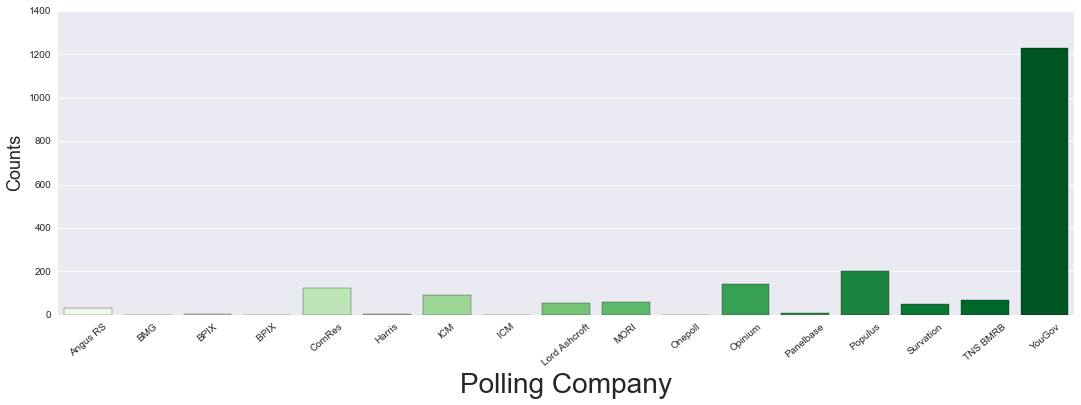

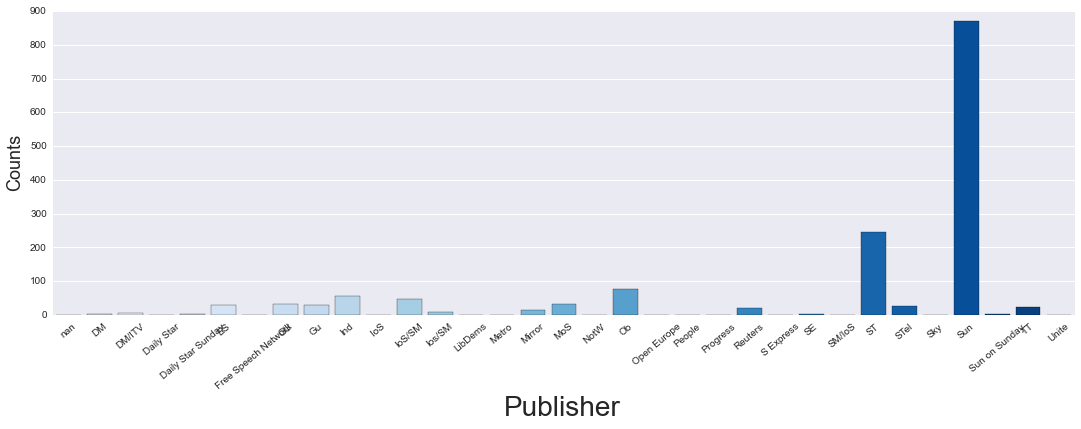

In [120]:
h = sns.factorplot("Polling", data = df_2010_2015,palette="Greens",aspect=3)
plt.xlabel('Polling Company', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

g = sns.factorplot("Publisher", data = df_2010_2015,palette="Blues",aspect=3)
plt.xlabel('Publisher', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
g.set_xticklabels(rotation=40)

Note that there are a lot of different polls represented in this dataset and a lot of different publishers.  However, YouGov are the dominant polling company and the Sun newspaper is the dominant publisher.  It will be interestign to see which poll results are in the Sun.  This is fairly straightforward to calculate so I will do this now

In [121]:
Sun_2010_2015_df = df_2010_2015[df_2010_2015["Publisher"] == "Sun"]

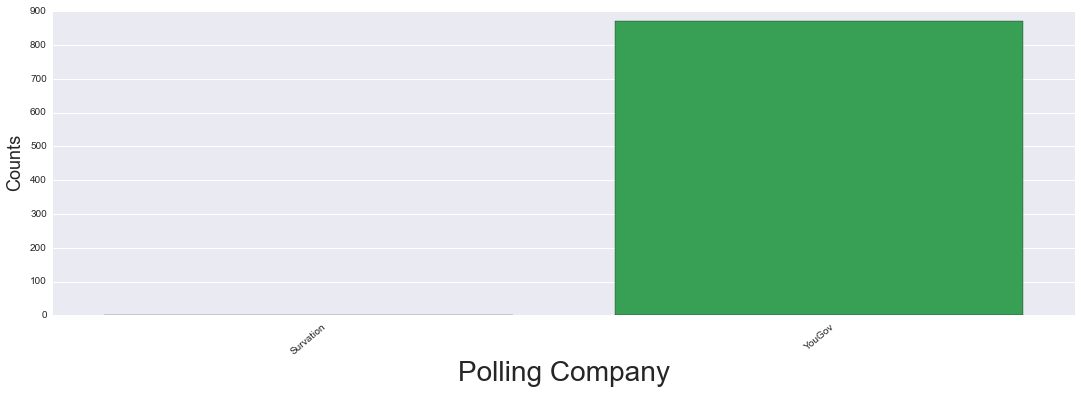

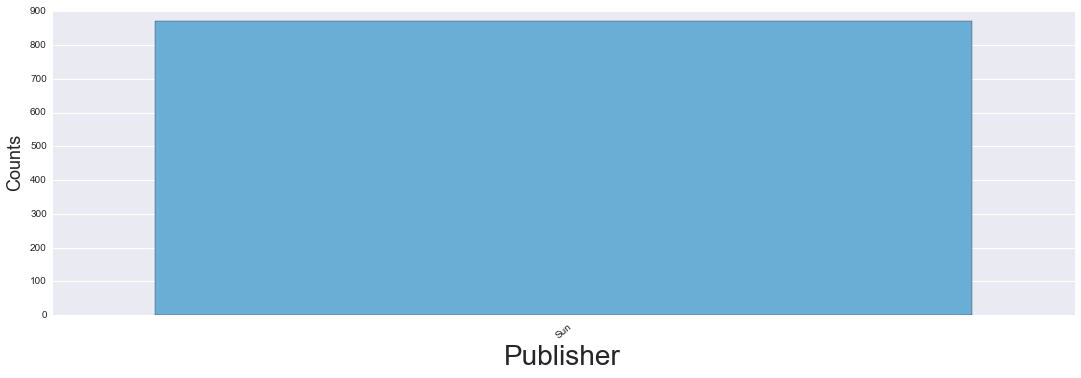

In [123]:
h = sns.factorplot("Polling", data = Sun_2010_2015_df,palette="Greens",aspect=3)
plt.xlabel('Polling Company', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
h.set_xticklabels(rotation=40)

g = sns.factorplot("Publisher", data = Sun_2010_2015_df,palette="Blues",aspect=3)
plt.xlabel('Publisher', fontsize=28)
plt.ylabel('Counts', fontsize=18)
plt.title("")
g.set_xticklabels(rotation=40)

As expected, The Sun almost exclusively only published polls from YouGov.

The first thing I want to do is to change the name of the "Unnamed: 3" column to "Date" which is what it is and it makes sense.  This is done below.

In [180]:
new_columns = df_2010_2015.columns.values
new_columns[0] = "Date"
df_2010_2015.columns = new_columns

It turns out that there are some strange dates in this file.  Only 3, but they were dated as being in 1900!.  Therefore, in order to remove these spurious dates, I am parsing the DataFrame so that it only contains dates which are after 2010.

In [181]:
df_2010_2015 = df_2010_2015[df_2010_2015["Date"]>2009-12-12]

In [182]:
df_2010_2015.head()

,Date,Polling,Publisher,Con,Unnamed: 9,Lab,Unnamed: 11,LD,Unnamed: 13,Con lead,...,Con bad,Lab good,Lab bad,LD good,LD bad,LD net,UKIP good,UKIP bad,Grn good,Grn bad
0,2010-05-12,ComRes,IoS/SM,38,NaN,34,NaN,21,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-05-12,ICM,STel,38,NaN,33,NaN,21,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-05-13,YouGov,ST,37,NaN,34,NaN,21,NaN,3,...,12,NaN,NaN,46,14,32,NaN,NaN,NaN,NaN
3,2010-05-14,Angus RS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40,38,56,56,33,23,NaN,NaN,NaN,NaN
4,2010-05-19,YouGov,Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, it is time to make my first plot.  I will plot all of the polling data in this 2010-2015 DataFrame for the Conservatives (blue), Labour (red), Liberal Democrats (yellow), UKIP (black) and Greens (green).  I have used the traditional colours of the parties apart from UKIP which I don't know.

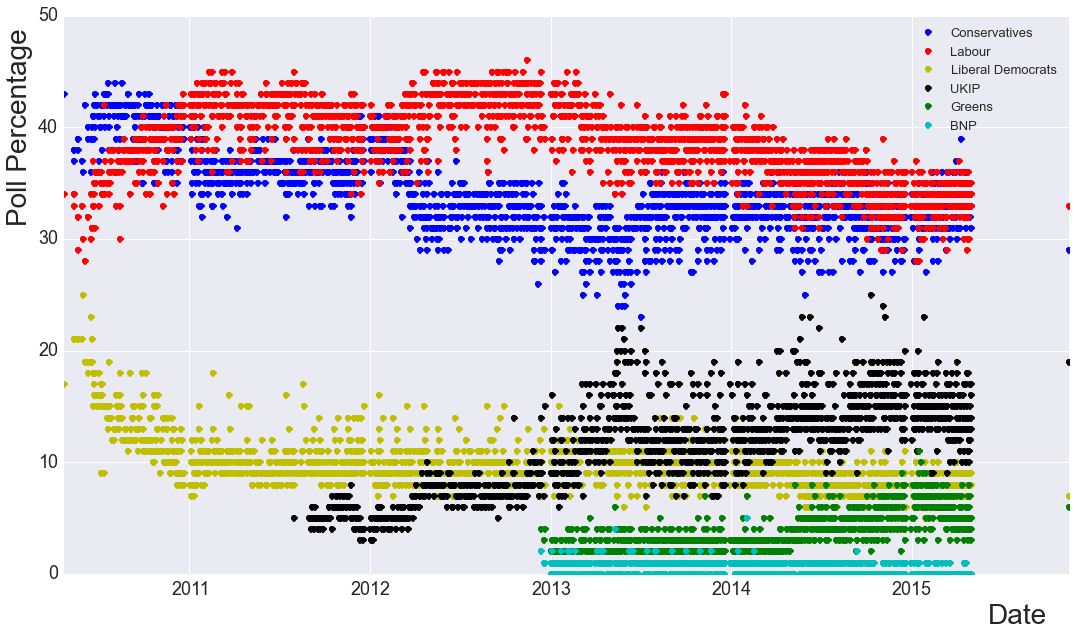

In [217]:
fig = plt.figure(figsize=(18,10))

plt.plot(df_2010_2015["Date"],df_2010_2015["Con"],'bo',label="Conservatives")
plt.plot(df_2010_2015["Date"],df_2010_2015["Lab"],'ro',label="Labour")
plt.plot(df_2010_2015["Date"],df_2010_2015["LD"],'yo',label="Liberal Democrats")
plt.plot(df_2010_2015["Date"],df_2010_2015["UKIP"],'ko',label="UKIP")
plt.plot(df_2010_2015["Date"],df_2010_2015["Green"],'go',label="Greens")
plt.plot(df_2010_2015["Date"],df_2010_2015["BNP"],'co',label="BNP")
plt.legend(fontsize=13)
plt.xlabel("Date",fontsize=28,x=0.95,y=1)
plt.ylabel("Poll Percentage",fontsize=28,x=0,y=0.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

The above plot I think is quite impressive. The bands are relatively wide which could come simply from the yearss being squashed together on this scale.  However, it also includes every poll and this is probably the answer.  Note that there is data for the Conservatives, Labour and the Liberal Democrats from the start of this time but UKIP, BNP and the Greens only come in later.

What is interesting is that the Liberal Democrat support fell sharply after the election in 2010 whilst the Conservatives support just faded away gradually.  As expected, the opposition support is quite good in the middle of an election period before falling off towards the end.  

One of the questions is where the support for UKIP came from.  Is it all from the Conservatives, does it come from the Liberal Democrats?  At the very least, it would be good to know where the Liberal Democrat 